plot max temperature evolution AND beam profile AND SEM+Thermionic emission 

2024.03.27, mariusz.sapinski@psi.ch




In [128]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

#matplotlib notebook


In [129]:
# read simulation configuration file name
with open("Last.txt") as f:
    cfname=f.readlines()[1]
confname=cfname[26:]    
print(confname)    

CERN_SPS_WS_2008.txt 



In [130]:
# for WIRESCANNER option output only
#dft = pd.read_csv("MaxTempVSTime.txt", skiprows=3, delim_whitespace=True, names=["em","time","pos","maxT"])
#dfc = pd.read_csv("IntensityVSTime.txt", skiprows=3, delim_whitespace=True, names=["time","pos","curr"])

# new format
#df = pd.read_csv("PSI_pChann_MBPTWS.txt", skiprows=4)
df = pd.read_csv("Last.txt", skiprows=9)

print(df.columns)


Index(['#   Time [us]', ' Position [mm]', ' Npart', ' MaxTemp [K]',
       ' SEMcurr [uA]', ' THcurr [uA] '],
      dtype='object')


In [131]:
# rename columns
df.rename({"#   Time [us]":"time"," Position [mm]":"pos"," Npart":"npart"," MaxTemp [K]":"maxt"," SEMcurr [uA]":"isem"," THcurr [uA] ":"ithc"}, axis='columns',inplace=True)

In [132]:
#print(dfc)
print(df)

           time      pos         npart      maxt          isem          ithc
0           2.9 -4.50000  4.096551e+08   300.241  1.176505e-09  2.019447e-90
1           5.8 -4.49971  4.098563e+08   300.482  1.177082e-09  2.173491e-90
2           8.7 -4.49942  4.100577e+08   300.723  1.177661e-09  2.350814e-90
3          11.6 -4.49913  4.102591e+08   300.964  1.178239e-09  2.555414e-90
4          14.5 -4.49884  4.104606e+08   301.205  1.178818e-09  2.792016e-90
...         ...      ...           ...       ...           ...           ...
49995  144988.4  9.99855  1.250376e+02  1454.657  3.591004e-16  3.044599e-08
49996  144991.3  9.99884  1.249012e+02  1454.634  3.587087e-16  3.042070e-08
49997  144994.2  9.99913  1.247650e+02  1454.611  3.583174e-16  3.039543e-08
49998  144997.1  9.99942  1.246289e+02  1454.587  3.579266e-16  3.037019e-08
49999  145000.0  9.99971  1.244929e+02  1454.564  3.575362e-16  3.034496e-08

[50000 rows x 6 columns]


In [133]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


[ 1.85095145e+10 -2.02417382e-09  1.63002301e+00]
0.14499710000000002 145000.0 2.9


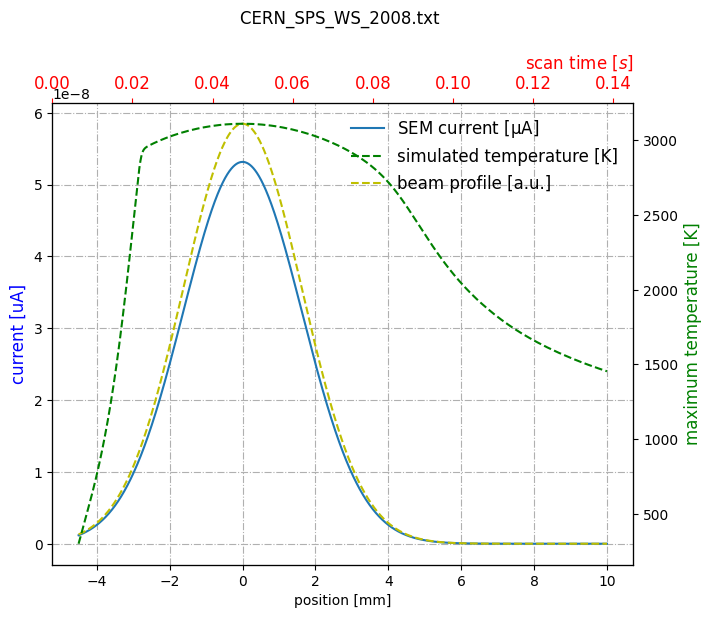

In [138]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

# factor 2 is for 2 wires
hsimse, = ax.plot([x*1 for x in df["pos"]],[1*x for x in df["isem"]],label=r"SEM current [$\rm \mu A$]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[2*x/10 for x in df["ithc"]],label=r"thermionic current/10 [$\rm \mu A$]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[x for x in df["ithc"]],label=r"thermionic current [$\rm \mu A$]")
scale=1.1*df["isem"].max()/df["npart"].max()
#scale=0.9*df["ithc"].max()/df["npart"].max()

hbeamp, = ax.plot([x*1 for x in df["pos"]],[scale*x for x in df["npart"]],"y--",label="beam profile [a.u.]")
ax.set_title(confname) 
#ax.set_ylim(0,0.6)
ax.grid(True, linestyle='-.')

# fit gauss to make sure it corresponds to input
popt, pcov = curve_fit(gauss_function, df['pos'], df["npart"], p0 = [df['npart'].max(), 0.0, 1.0])
print(popt)
#ax.plot(x, gauss_function(x, *popt), label='fit')

axtemp = ax.twinx()
#axtemp.set_ylim(0,2800)
hsimt, = axtemp.plot([x*1 for x in df["pos"]],df["maxt"],'g--',label="simulated temperature [K]")
axtemp.set_ylabel("maximum temperature [K]", fontsize=12, color='g')

ax.set_xlabel("position [mm]")
ax.set_ylabel("current [uA]", fontsize=12, color='b')

axtime = ax.twiny()
tlimend=(df["time"].iloc[-1]-df["time"].iloc[0])/1e6 # ? 60 mm/s
print(tlimend,df["time"].iloc[-1],df["time"].iloc[0])
axtime.set_xlim(0,tlimend)
axtime.set_xlabel(r"scan time [$s$]",loc="right",fontsize=12, color='red', labelpad=5)
axtime.tick_params(axis='x', colors='red', labelsize=12)    #setting up X-axis tick color to red
#ax.tick_params(axis='both', which='major', labelsize=10)

#ax.set_xlim(-2,3)


ax.legend(handles=[hsimse,hsimt,hbeamp], fontsize=12, frameon=False)
#ax.legend(handles=[hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
#ax.grid()

plt.savefig('all.png')

In [118]:
dw=30e-6
vw=1

print("dt [us] = ",df["time"].iloc[2]-df["time"].iloc[1])
print("max wirestep [us] = ",dw/vw*1e6)

dt [us] =  0.46666699999999994
max wirestep [us] =  30.0


In [119]:
# max SEM current [uA] 
print(max(df['isem']))

5.31581993356225e-08


In [120]:
# compare numbers of protons 
Np=2e13
frev=43478.26

print(Np*frev*dw/vw/1e13)

print(df["npart"].sum()/1e13)

print("missing: ",df["npart"].sum()/(Np*frev*dw/vw))

2.6086956
2.589422085372693
missing:  0.992611819245102
